# Dask Dataframes

*[Dask](http://dask.pydata.org) — это гибкая библиотека параллельных вычислений для аналитических вычислений*, написанная на Python. Dask похож на Spark тем, что лениво строит направленный ациклический граф (DAG) задач и разбивает большие наборы данных на небольшие части, называемые разделами. См. приведенное ниже изображение с [веб-страницы Dask](http://dask.pydata.org) для иллюстрации.

![http://dask.pydata.org/en/latest/_images/collections-schedulers.png](https://github.com/pnavaro/big-data/blob/master/notebooks/images/collections-schedulers.png?raw=1) 

Он имеет три основных интерфейса:

* [Массив](http://dask.pydata.org/en/latest/array.html), который работает как массивы [NumPy](http://www.numpy.org/);
* [Bag](http://dask.pydata.org/en/latest/bag.html), аналогичный интерфейсу RDD в Spark;
* [DataFrame](http://dask.pydata.org/en/latest/dataframe.html), который работает как [Pandas](https://pandas.pydata.org/) DataFrame.

Хотя он может работать в [распределенном кластере](http://dask.pydata.org/en/latest/distributed.html), Dask также очень хорошо работает на машине с одним процессором.

## DataFrames

Фреймы данных Dask выглядят и работают (в основном) как кадры Pandas DataFrame, но они работают в той же инфраструктуре, что и dask.delayed.

Модуль dask.dataframe реализует заблокированный параллельный объект DataFrame, который имитирует большое подмножество DataFrame Pandas. Один даск «DataFrame» состоит из множества pandas «DataFrames» в памяти, разделенных по индексу. Одна операция над dask DataFrame запускает множество операций pandas над составляющими pandas `DataFrame` таким образом, чтобы учитывать потенциальный параллелизм и ограничения памяти.

**Сопутствующая документация**

*  [Dask DataFrame documentation](http://dask.pydata.org/en/latest/dataframe.html)
*  [Pandas documentation](http://pandas.pydata.org/)

мы извлечем некоторые исторические данные о рейсах из Нью-Йорка в период с 1990 по 2000 год. Данные взяты отсюда (http://stat-computing.org/dataexpo/2009/the-data.html). 

Мы будем использовать dask.dataframe для построения вычислений. Функция dask.dataframe.read_csv может принимать globstring, например data/nycflights/*.csv, и выполнять параллельные вычисления для всех данных одновременно.

**Описания переменных**
1.	`Year` 1987-2008
 2.	`Month` 1-12
 3. `DayofMonth` 1-31
 4.	`DayOfWee` 1 (Monday) - 7 (Sunday)
 5.	`DepTime` actual departure time (local, hhmm)
 6.	`CRSDepTime` scheduled departure time (local, hhmm)
 7.	`ArrTime` actual arrival time (local, hhmm)
 8.	`CRSArrTime` scheduled arrival time (local, hhmm)
 9.	`UniqueCarrier` unique carrier code
 10. `FlightNum` flight number
 11. `TailNu` plane tail number
 12. `ActualElapsedTime` in minutes
 13. `CRSElapsedTime` in minutes
 14. `AirTime` in minutes
 15. `ArrDelay` arrival delay, in minutes
 16. `DepDelay` departure delay, in minutes
 17. `Origin` origin IATA airport code
 18. `Dest` destination IATA airport code
 19. `Distance` in miles
 20. `TaxiIn` taxi in time, in minutes
 21. `TaxiOut` taxi out time in minutes
 22. `Cancelled` was the flight cancelled?
 23. `CancellationCode` reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 24. `Diverted` 1 = yes, 0 = no
 25. `CarrierDelay` in minutes
 26. `WeatherDelay` in minutes
 27. `NASDelay` in minutes
 28. `SecurityDelay` in minutes
 29. `LateAircraftDelay` in minutes


 Название Описание
 
 1. `Год` 1987-2008 гг.
 2. `Месяц` 1-12
 3. `День месяца` 1-31
 4. `DayOfWee` 1 (понедельник) - 7 (воскресенье)
 5. Фактическое время отправления `DepTime` (местное, ччмм)
 6. Запланированное время отправления CRSDepTime (местное, ччмм)
 7. Фактическое время прибытия `ArrTime` (местное, ччмм)
 8. Запланированное время прибытия `CRSArrTime` (местное, ччмм)
 9. Уникальный код перевозчика «UniqueCarrier».
 10. Номер рейса `FlightNum`
 11. Бортовой номер самолета `TailNu`
 12. ActualElapsedTime в минутах
 13. `CRSElapsedTime` в минутах
 14. Эфирное время в минутах
 15. Задержка прибытия ArrDelay, в минутах
 16. Задержка отправления `DepDelay`, в минутах
 17. `Происхождение` код аэропорта ИАТА происхождения
 18. Код аэропорта назначения «Пункт назначения».
 19. «Расстояние» в милях
 20. `TaxiIn` руление по времени, в минутах
 21. `TaxiOut` время выруливания в минутах
 22. «Отменен» был ли рейс отменен?
 23. Причина отмены `CancellationCode` (A = оператор, B = погода, C = NAS, D = безопасность)
 24. «Отклонено» 1 = да, 0 = нет
 25. `CarrierDelay` в минутах
 26. Погодная задержка в минутах
 27. `NASDelay` в минутах
 28. `SecurityDelay` в минутах
 29. `LateAircraftDelay` в минутах

In [ ]:
!wget https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz

--2022-08-18 16:04:44--  https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44120091 (42M) [application/x-gzip]
Saving to: ‘nycflights.tar.gz’

nycflights.tar.gz   100%[===================>]  42.08M  88.3MB/s    in 0.5s    

2022-08-18 16:04:45 (88.3 MB/s) - ‘nycflights.tar.gz’ saved [44120091/44120091]



In [ ]:
!python -m pip install 'fsspec>=0.3.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 4.3 MB/s 


### Подготовка данных

In [ ]:
import os
import pandas as pd
pd.set_option("max.rows", 10)
os.getcwd()

'/content'

In [ ]:
import os  
import tarfile 

def extract_flight():
    here = os.getcwd()
    flightdir = os.path.join(here,'data', 'nycflights')
    if not os.path.exists(flightdir):
       print("Extracting flight data")
       tar_path = os.path.join('data', 'nycflights.tar.gz')
       with tarfile.open(tar_path, mode='r:gz') as flights:
          flights.extractall('data/')
            
extract_flight() # этот вызов функции извлечет 10 CSV-файлов в data/nycflights

Extracting flight data


### Загрузить данные из CSV в Dask Dataframes

In [ ]:
import os
here = os.getcwd()
filenames = os.path.join(here, 'data', 'nycflights', '*.csv')
filenames

'/content/data/nycflights/*.csv'

In [9]:
import dask
import dask.dataframe as dd

df = dd.read_csv(filenames,
                 parse_dates={'Date': [0, 1, 2]})


Давайте посмотрим на dataframe

In [10]:
### Получить первые 5 строк
df.head(5)

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [11]:
df.dtypes

Date          datetime64[ns]
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
                   ...      
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
Length: 21, dtype: object

###Что сейчас произошло?

В отличие от `pandas.read_csv`, который считывает весь файл перед выводом типов данных, `dask.dataframe.read_csv` считывает только выборку из начала файла (или первого файла, если используется глобус). Затем эти предполагаемые типы данных применяются при чтении всех разделов.

В этом случае типы данных, выведенные в образце, неверны. Первые «n» строк не имеют значения для «CRSElapsedTime» (которое pandas интерпретирует как «плавающее»), а позже они оказываются строками (тип «объекта»). Когда это происходит, у вас есть несколько вариантов:

- Укажите dtypes напрямую, используя ключевое слово `dtype`. Это рекомендуемое решение, так как оно наименее подвержено ошибкам (лучше быть явным, чем неявным), а также наиболее производительным.
- Увеличьте размер ключевого слова `sample` (в байтах).
- Используйте `assume_missing`, чтобы dask предположил, что столбцы, выведенные как `int` (которые не допускают пропущенных значений), на самом деле являются числами с плавающей запятой (которые допускают пропущенные значения). В нашем конкретном случае это неприменимо.

In [ ]:
df.dtypes

In [12]:
df = dd.read_csv(filenames,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': object,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [13]:
df.tail(5)

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


Let's take a look at one more example to fix ideas.

In [14]:
len(df)

2611892

- Dask исследовал входной путь и обнаружил десять совпадающих файлов.
- Набор заданий был разумно создан для каждого фрагмента - в данном случае по одному на исходный CSV-файл.
- Каждый файл загружался в кадр данных pandas, к нему применялась len().
- Промежуточные итоги были объединены, чтобы дать вам окончательную сумму гранта.

## Вычисления с `dask.dataframe`

Мы вычисляем максимум столбца DepDelay. С помощью dask.delayed мы могли бы создать это вычисление следующим образом:

```python
maxes = []
for fn in filenames:
    df = dask.delayed(pd.read_csv)(fn)
    maxes.append(df.DepDelay.max())
    
final_max = dask.delayed(max)(maxes)
final_max.compute()
```
Теперь мы просто используем обычный синтаксис Pandas следующим образом:

In [17]:
df.DepDelay.max()

dd.Scalar<series-..., dtype=float64>

In [18]:
%time df.DepDelay.max().compute()

CPU times: user 10.8 s, sys: 331 ms, total: 11.1 s
Wall time: 6.86 s


1435.0

Это записывает отложенное вычисление для нас, а затем запускает его. Напомним, что отложенное вычисление представляет собой даск-граф, состоящий из пар ключ-значение.

Некоторые вещи, которые следует отметить:

1. Как и в случае с `dask.delayed`, нам нужно вызвать `.compute()`, когда мы закончим. До этого момента вычисления не происходят.
2. Dask удалит промежуточные результаты (например, полный кадр данных pandas для каждого файла) как можно скорее.
     - Это позволяет нам обрабатывать наборы данных, которые больше, чем размер памяти.
     - Это означает, что повторные вычисления должны будут каждый раз загружать все данные
    
Как и в случае с объектами `Delayed`, вы можете просмотреть базовый график задачи, используя метод `.visualize`:

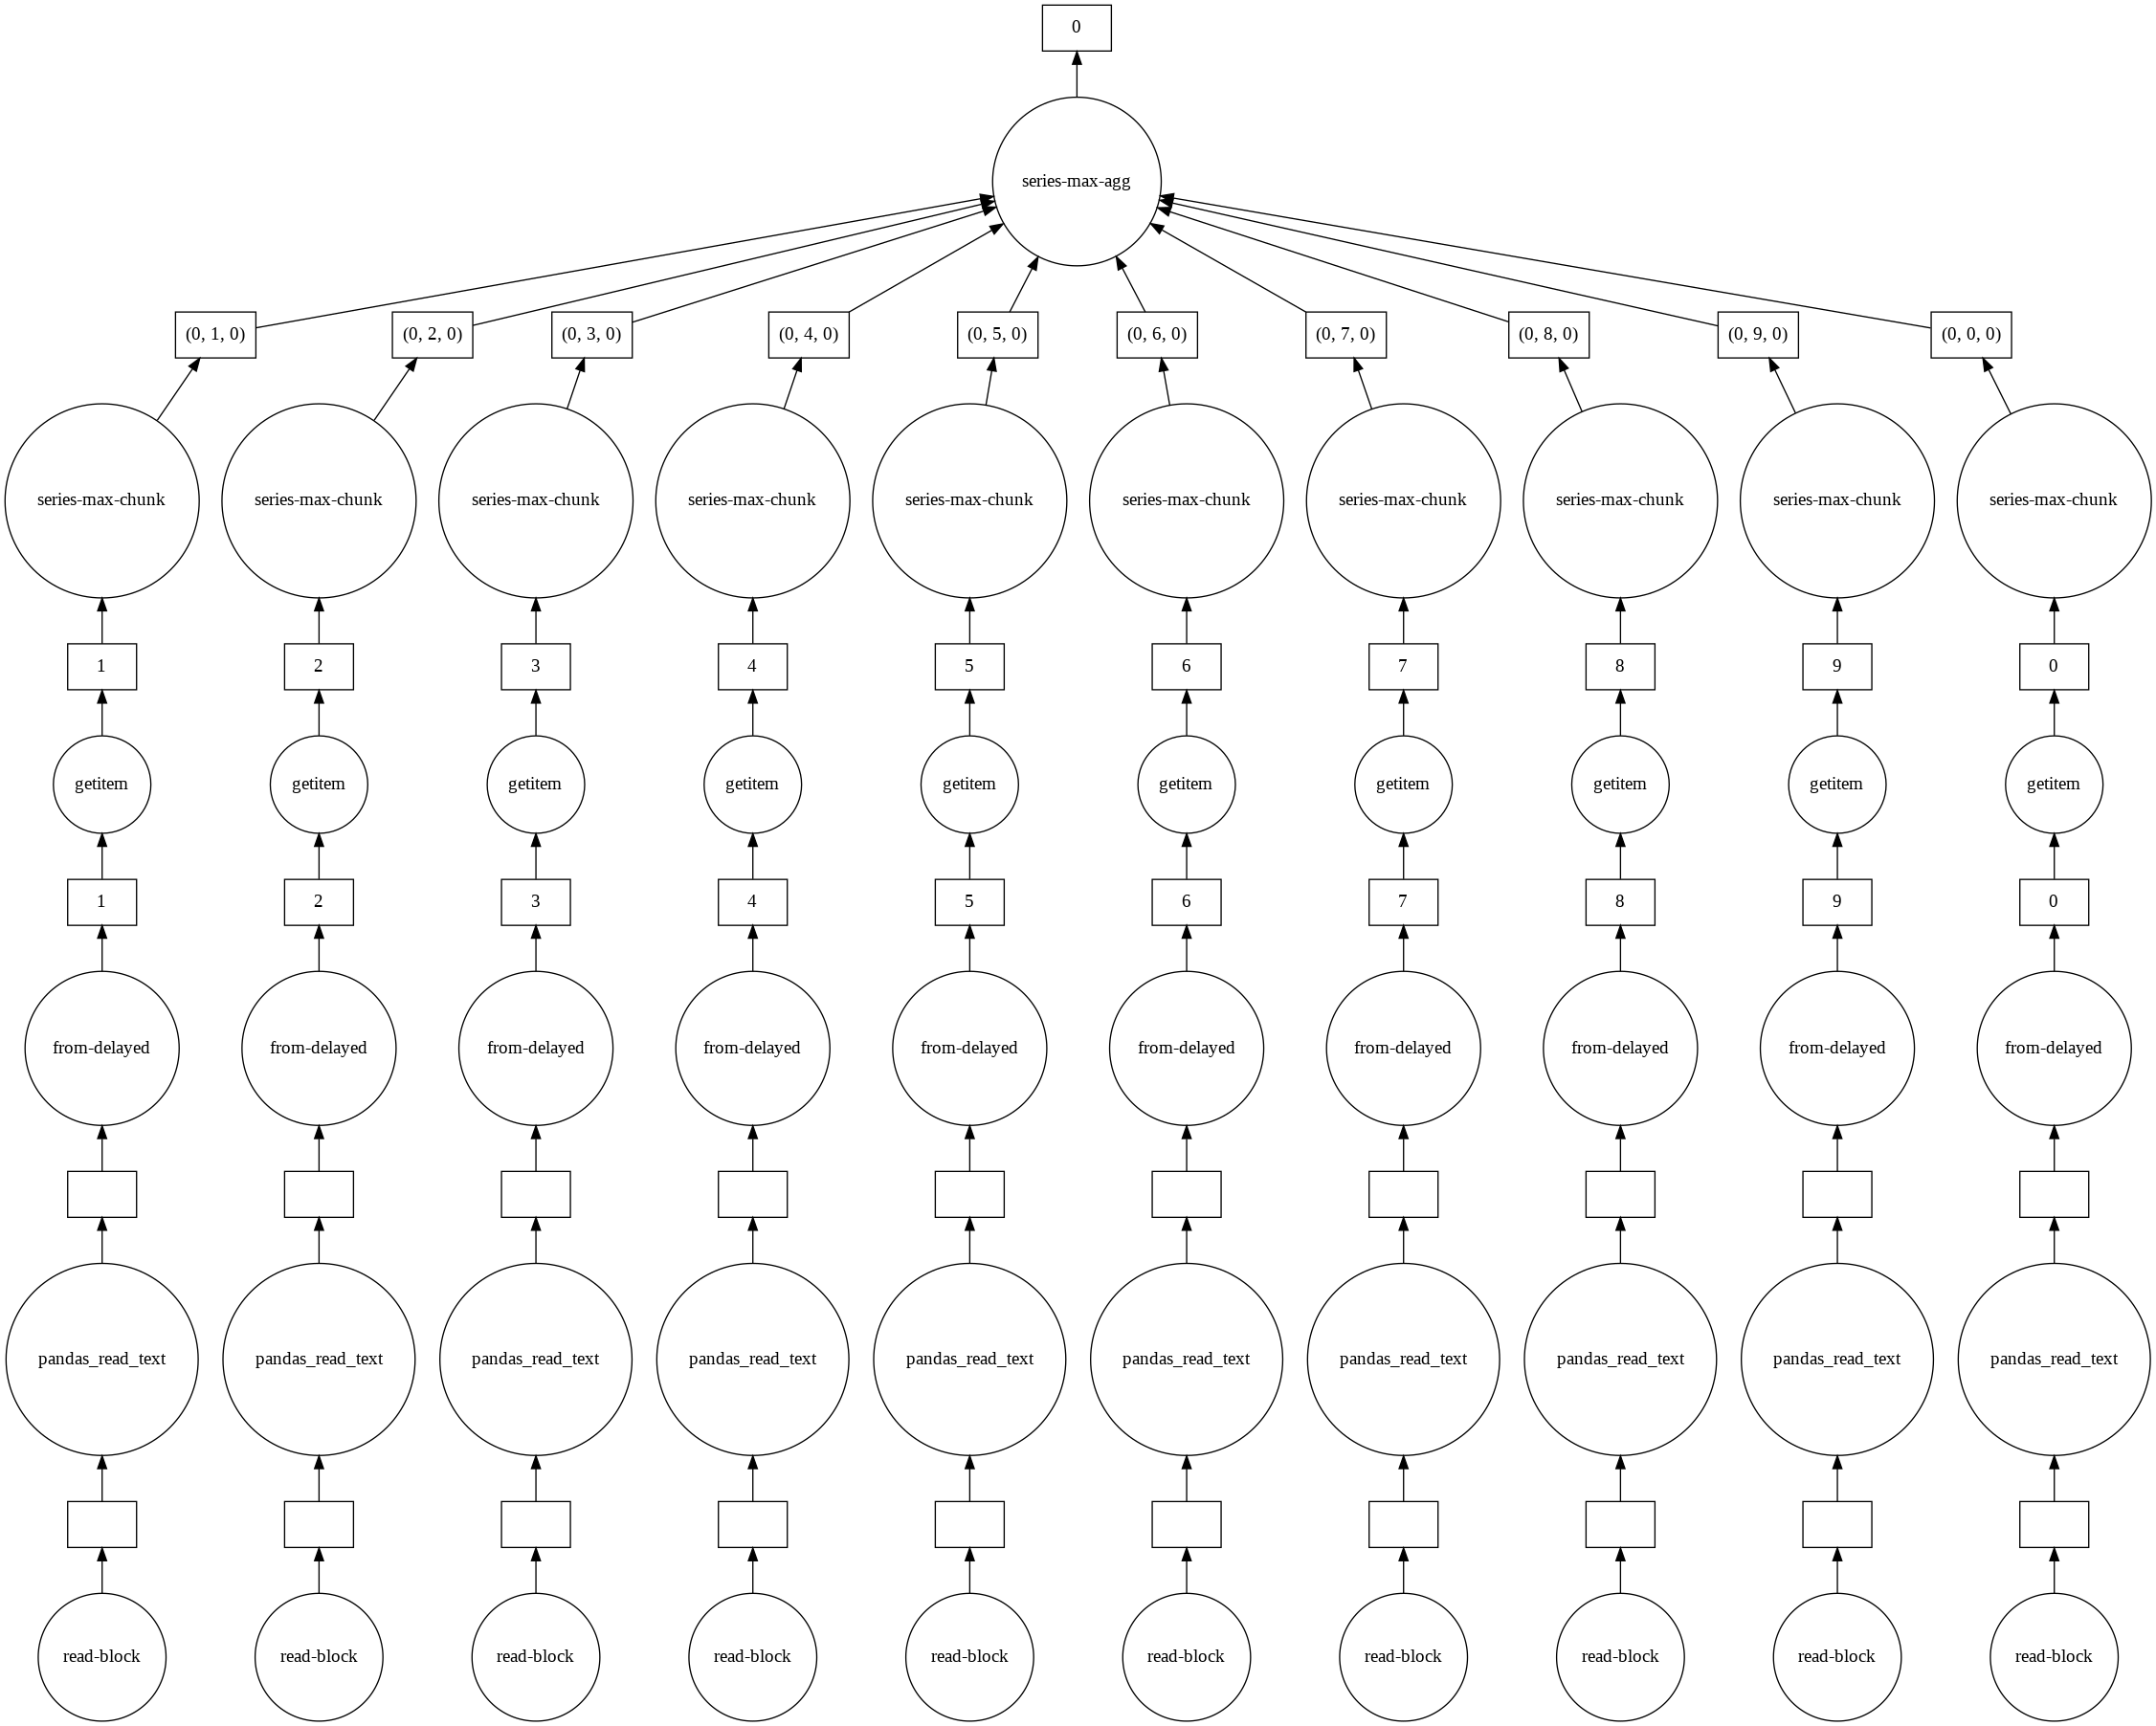

In [19]:
df.DepDelay.max().visualize()

In [20]:
result = df.DepDelay.mean()  # создаем план задачи

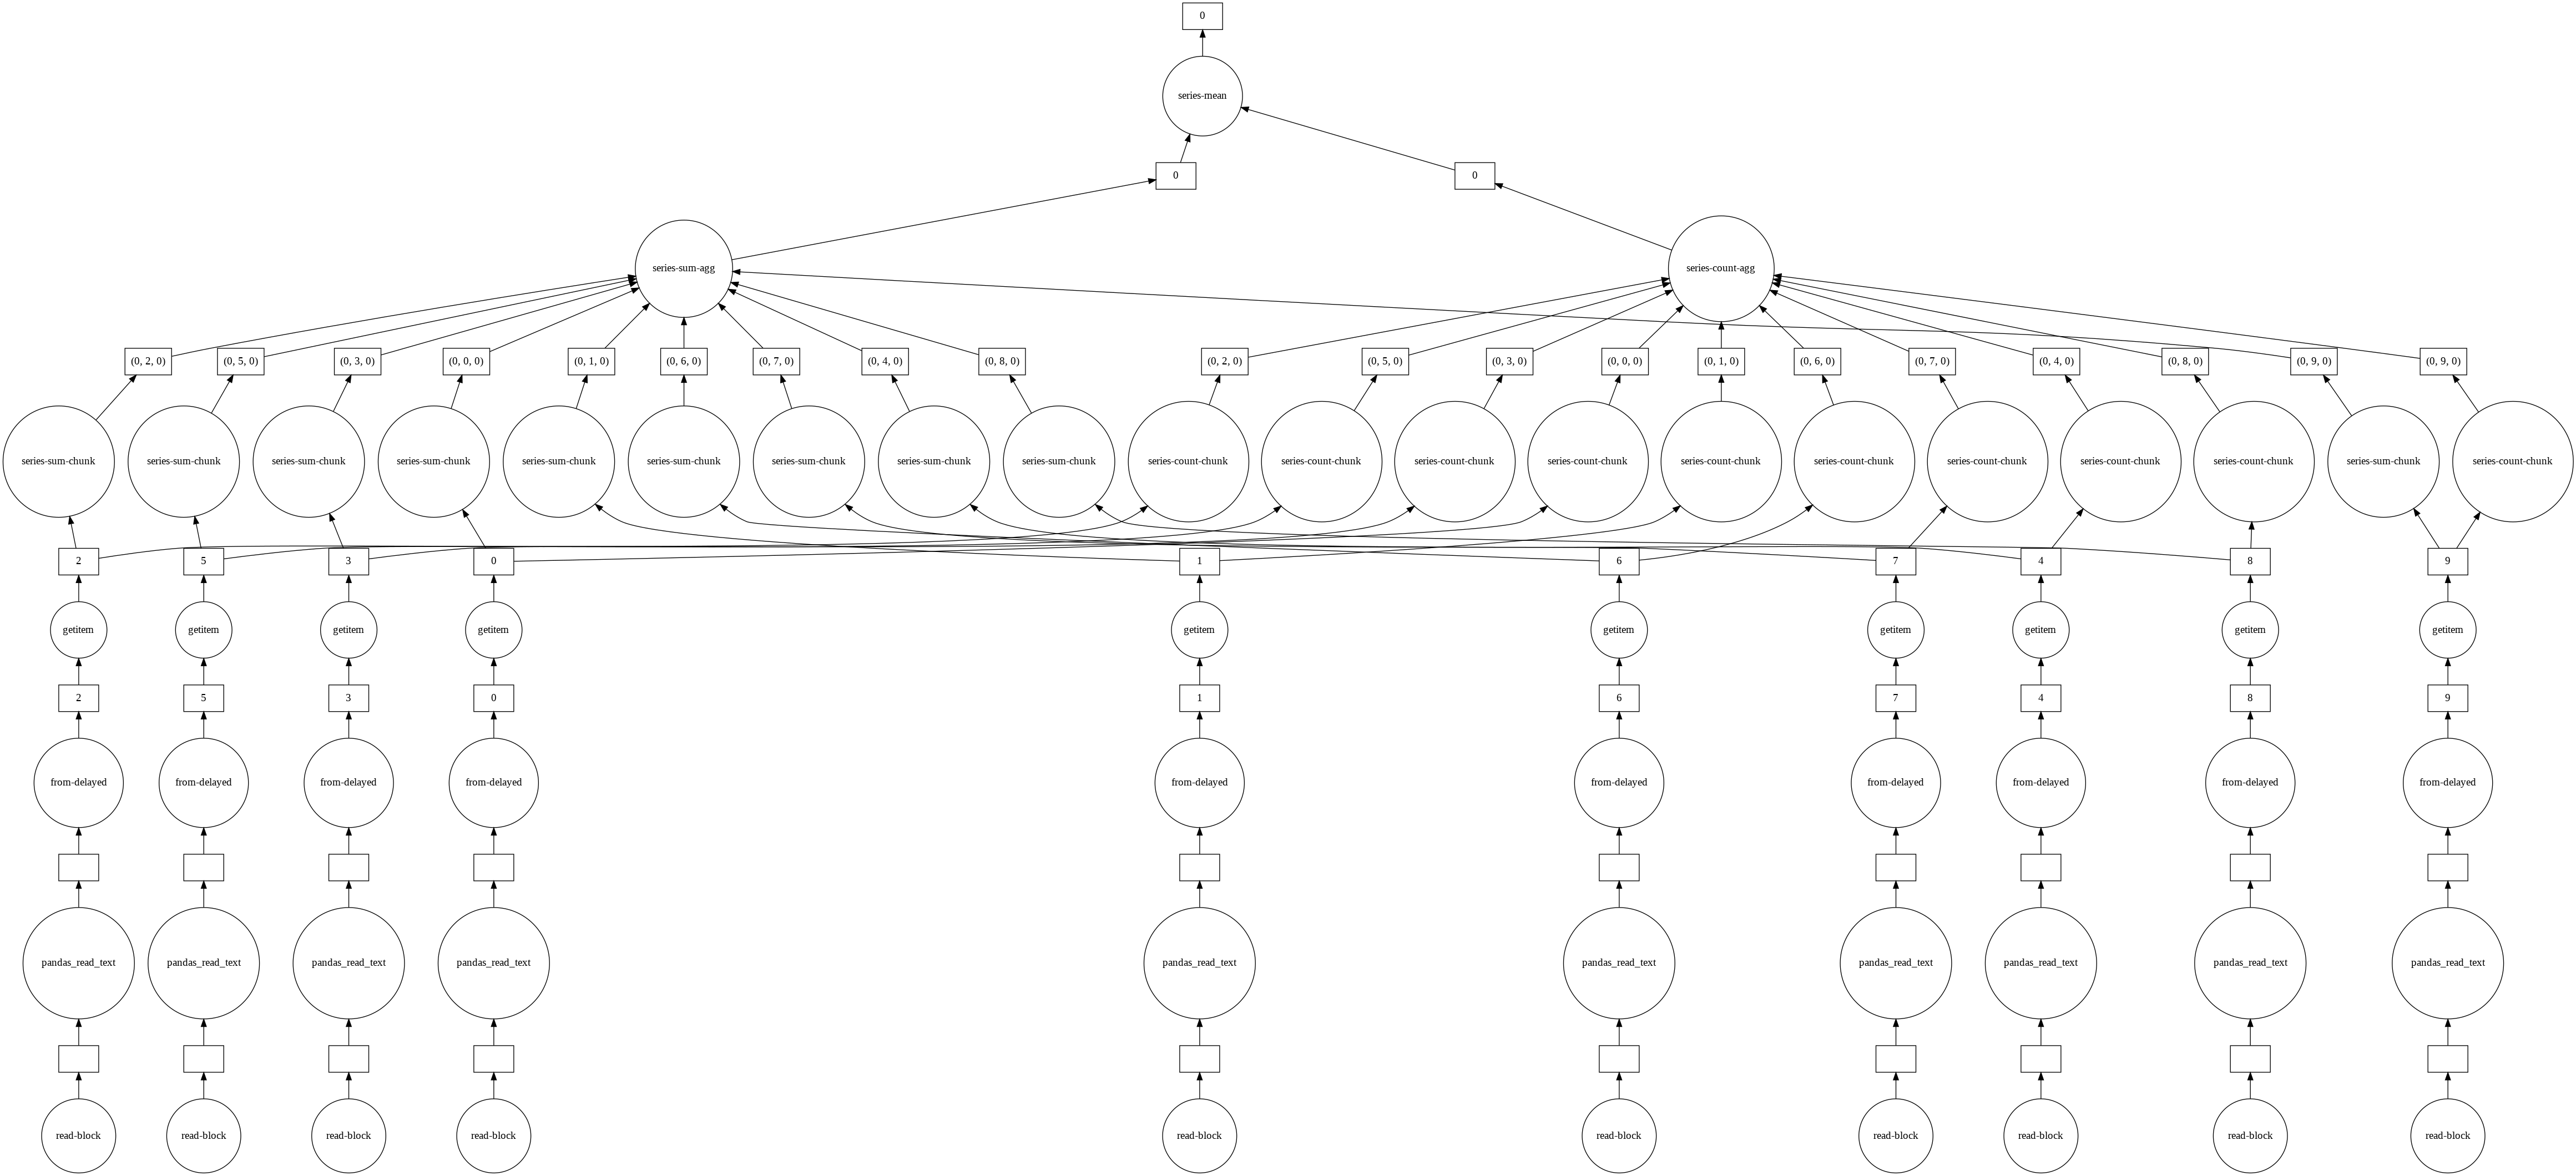

In [23]:
result.visualize()

In [22]:
%time result.compute()           # фактический запуск задачи

CPU times: user 11.3 s, sys: 479 ms, total: 11.8 s
Wall time: 7.21 s


9.206602541321965

## Хранить данные в формате Apache Parquet

Dask поощряет пользователей dataframe хранить и загружать данные, используя Parquet вместо csv. [Apache Parquet](http://parquet.apache.org/) — это столбчатый двоичный формат, который легко разбить на несколько файлов (проще для параллельной загрузки) и, как правило, с ним гораздо проще работать, чем с HDF5 (из библиотеки Dask). перспектива). Это также распространенный формат, используемый другими системами больших данных, такими как [Apache Spark] (http://spark.apache.org/) и [Apache Impala] (http://impala.apache.org/), поэтому он полезен. обмениваться с другими системами.

In [24]:
df.drop("TailNum", axis=1).to_parquet("nycflights/")  # сохраним данные в формат parquet 

It is possible to specify dtypes and compression when converting. This can definitely help give you significantly greater speedups, but just using the default settings will still be a large improvement.

In [ ]:
df.size.compute()

In [25]:
import dask.dataframe as dd
df = dd.read_parquet("nycflights/")
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
index,,,,,,,,,,,,,,,,,,,,
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,86.0,81.0,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,73.0,81.0,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,84.0,81.0,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,88.0,81.0,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,77.0,81.0,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [26]:
df.dtypes

Date          datetime64[ns]
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
                   ...      
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled               bool
Diverted               int64
Length: 20, dtype: object

In [27]:
result = df.DepDelay.mean() 

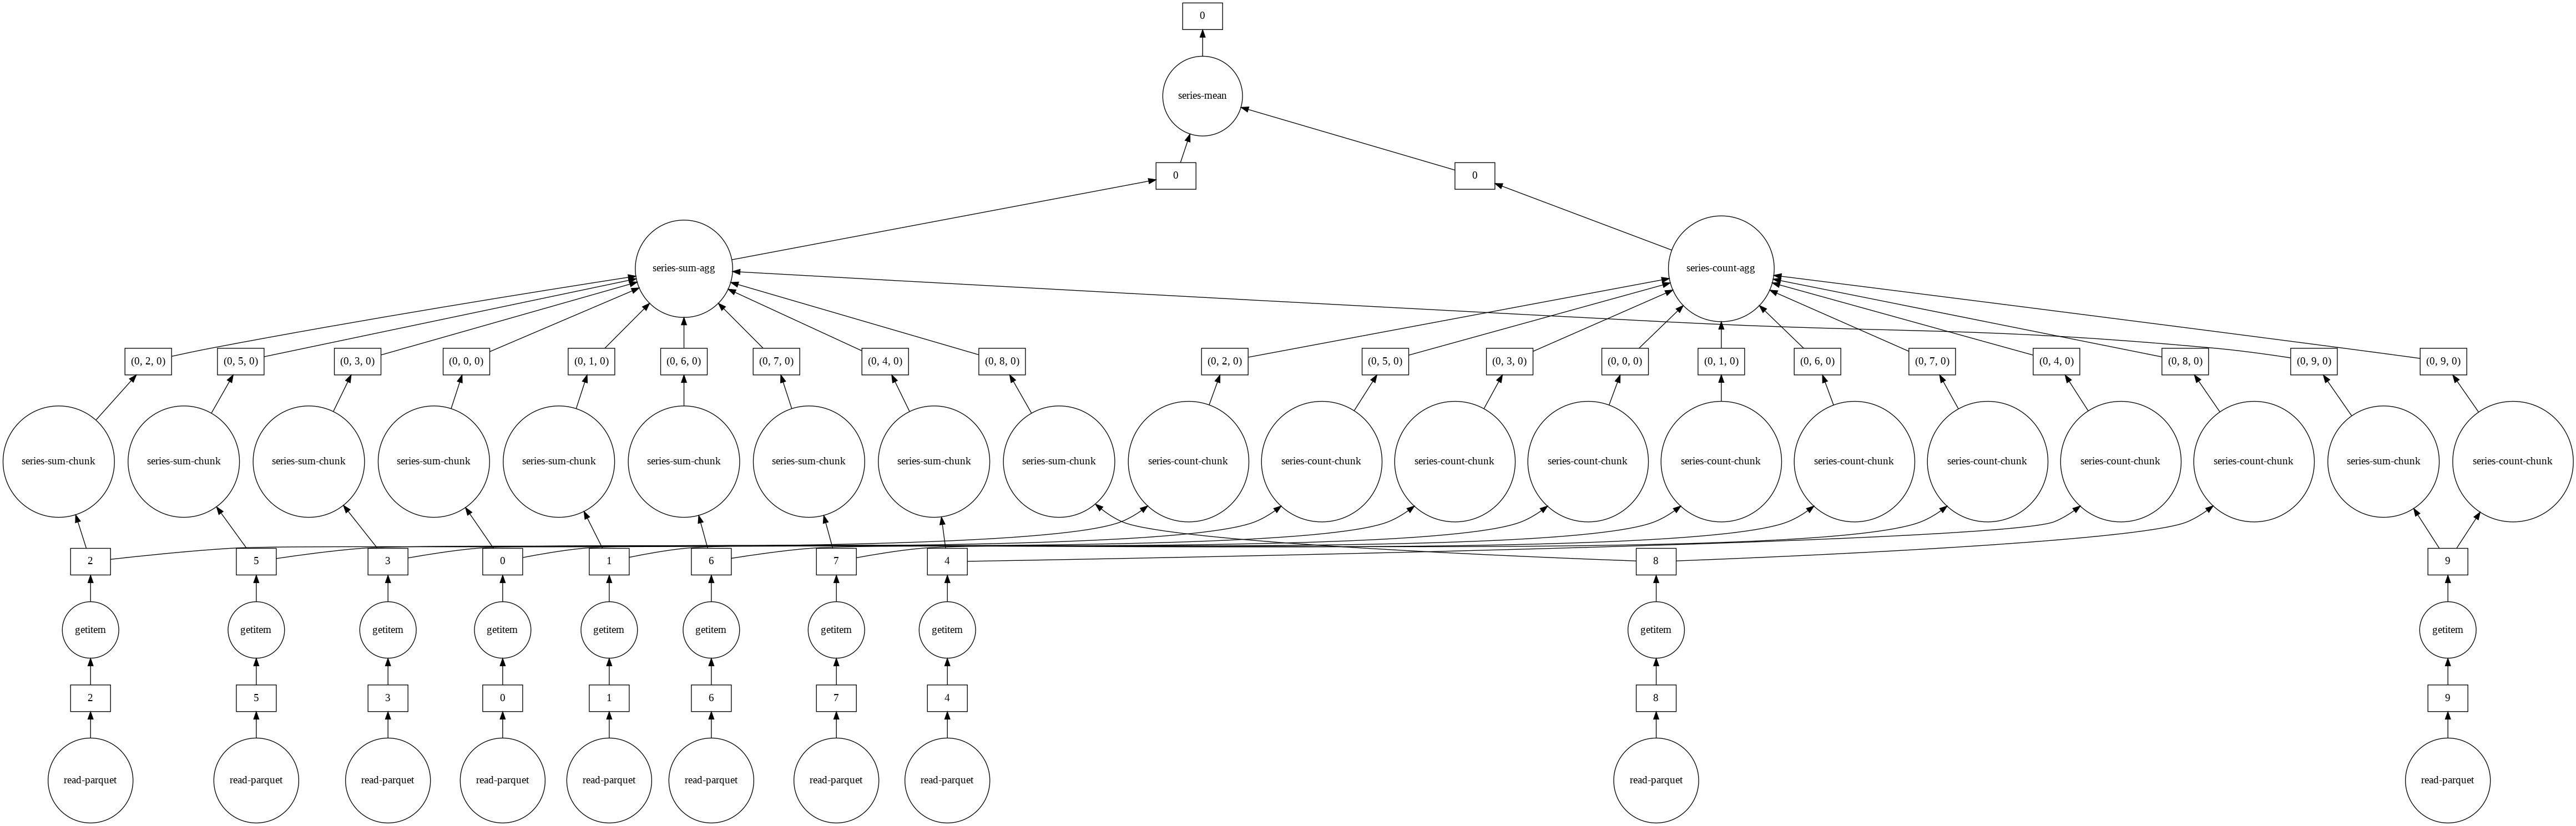

In [28]:
result.visualize()

In [29]:
%time result.compute()

CPU times: user 207 ms, sys: 41.1 ms, total: 248 ms
Wall time: 168 ms


9.206602541321965

Вычисления выполняются намного быстрее, поскольку для Parquet легко извлечь столбец DepDelay.

### Преимущества паркета:

- Двоичное представление данных, обеспечивающее быстрое преобразование байтов на диске в байты в памяти.
- Хранилище столбцов, что означает, что вы можете загрузить столько столбцов, сколько вам нужно, без загрузки всего набора данных.
- Хранилище с разбивкой по строкам, чтобы вы могли извлекать данные из определенного диапазона, не касаясь других
- Статистика по частям, чтобы вы могли быстро найти подмножества
- Сжатие

Разделы и индекс
---------------------------

Индекс Pandas связывает значение с каждой записью/строкой ваших данных. В результате операции, которые выравниваются по индексу, такие как `loc`, могут выполняться немного быстрее.

В dask.dataframe этот индекс становится еще более важным. Напомним, что один даск DataFrame состоит из нескольких Pandas DataFrame. Эти кадры данных разделены по индексу по значению. Например, при работе с временными рядами мы можем разделить наш большой набор данных по месяцам.

Вспомните, что эти многочисленные разделы наших данных не могут одновременно находиться в памяти, вместо этого они могут находиться на диске; у нас просто есть задачи, которые могут материализовать эти pandas `DataFrames` по требованию.

Разделение ваших данных может значительно повысить эффективность. Такие операции, как `loc`, `groupby` и `merge/join` по индексу *гораздо эффективнее*, чем операции по другим столбцам. Вы можете увидеть, как ваш набор данных разбит на разделы с помощью атрибута `.divisions`. Обратите внимание, что данные, поступающие из простых источников данных, таких как файлы CSV, по умолчанию не индексируются интеллектуально. В этих случаях значения для `.divisions` будут `None.`

In [30]:
df = dd.read_csv(filenames,
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})
df.divisions

(None, None, None, None, None, None, None, None, None, None, None)

In [37]:
result = df2.loc[1997].DepDelay.mean() 

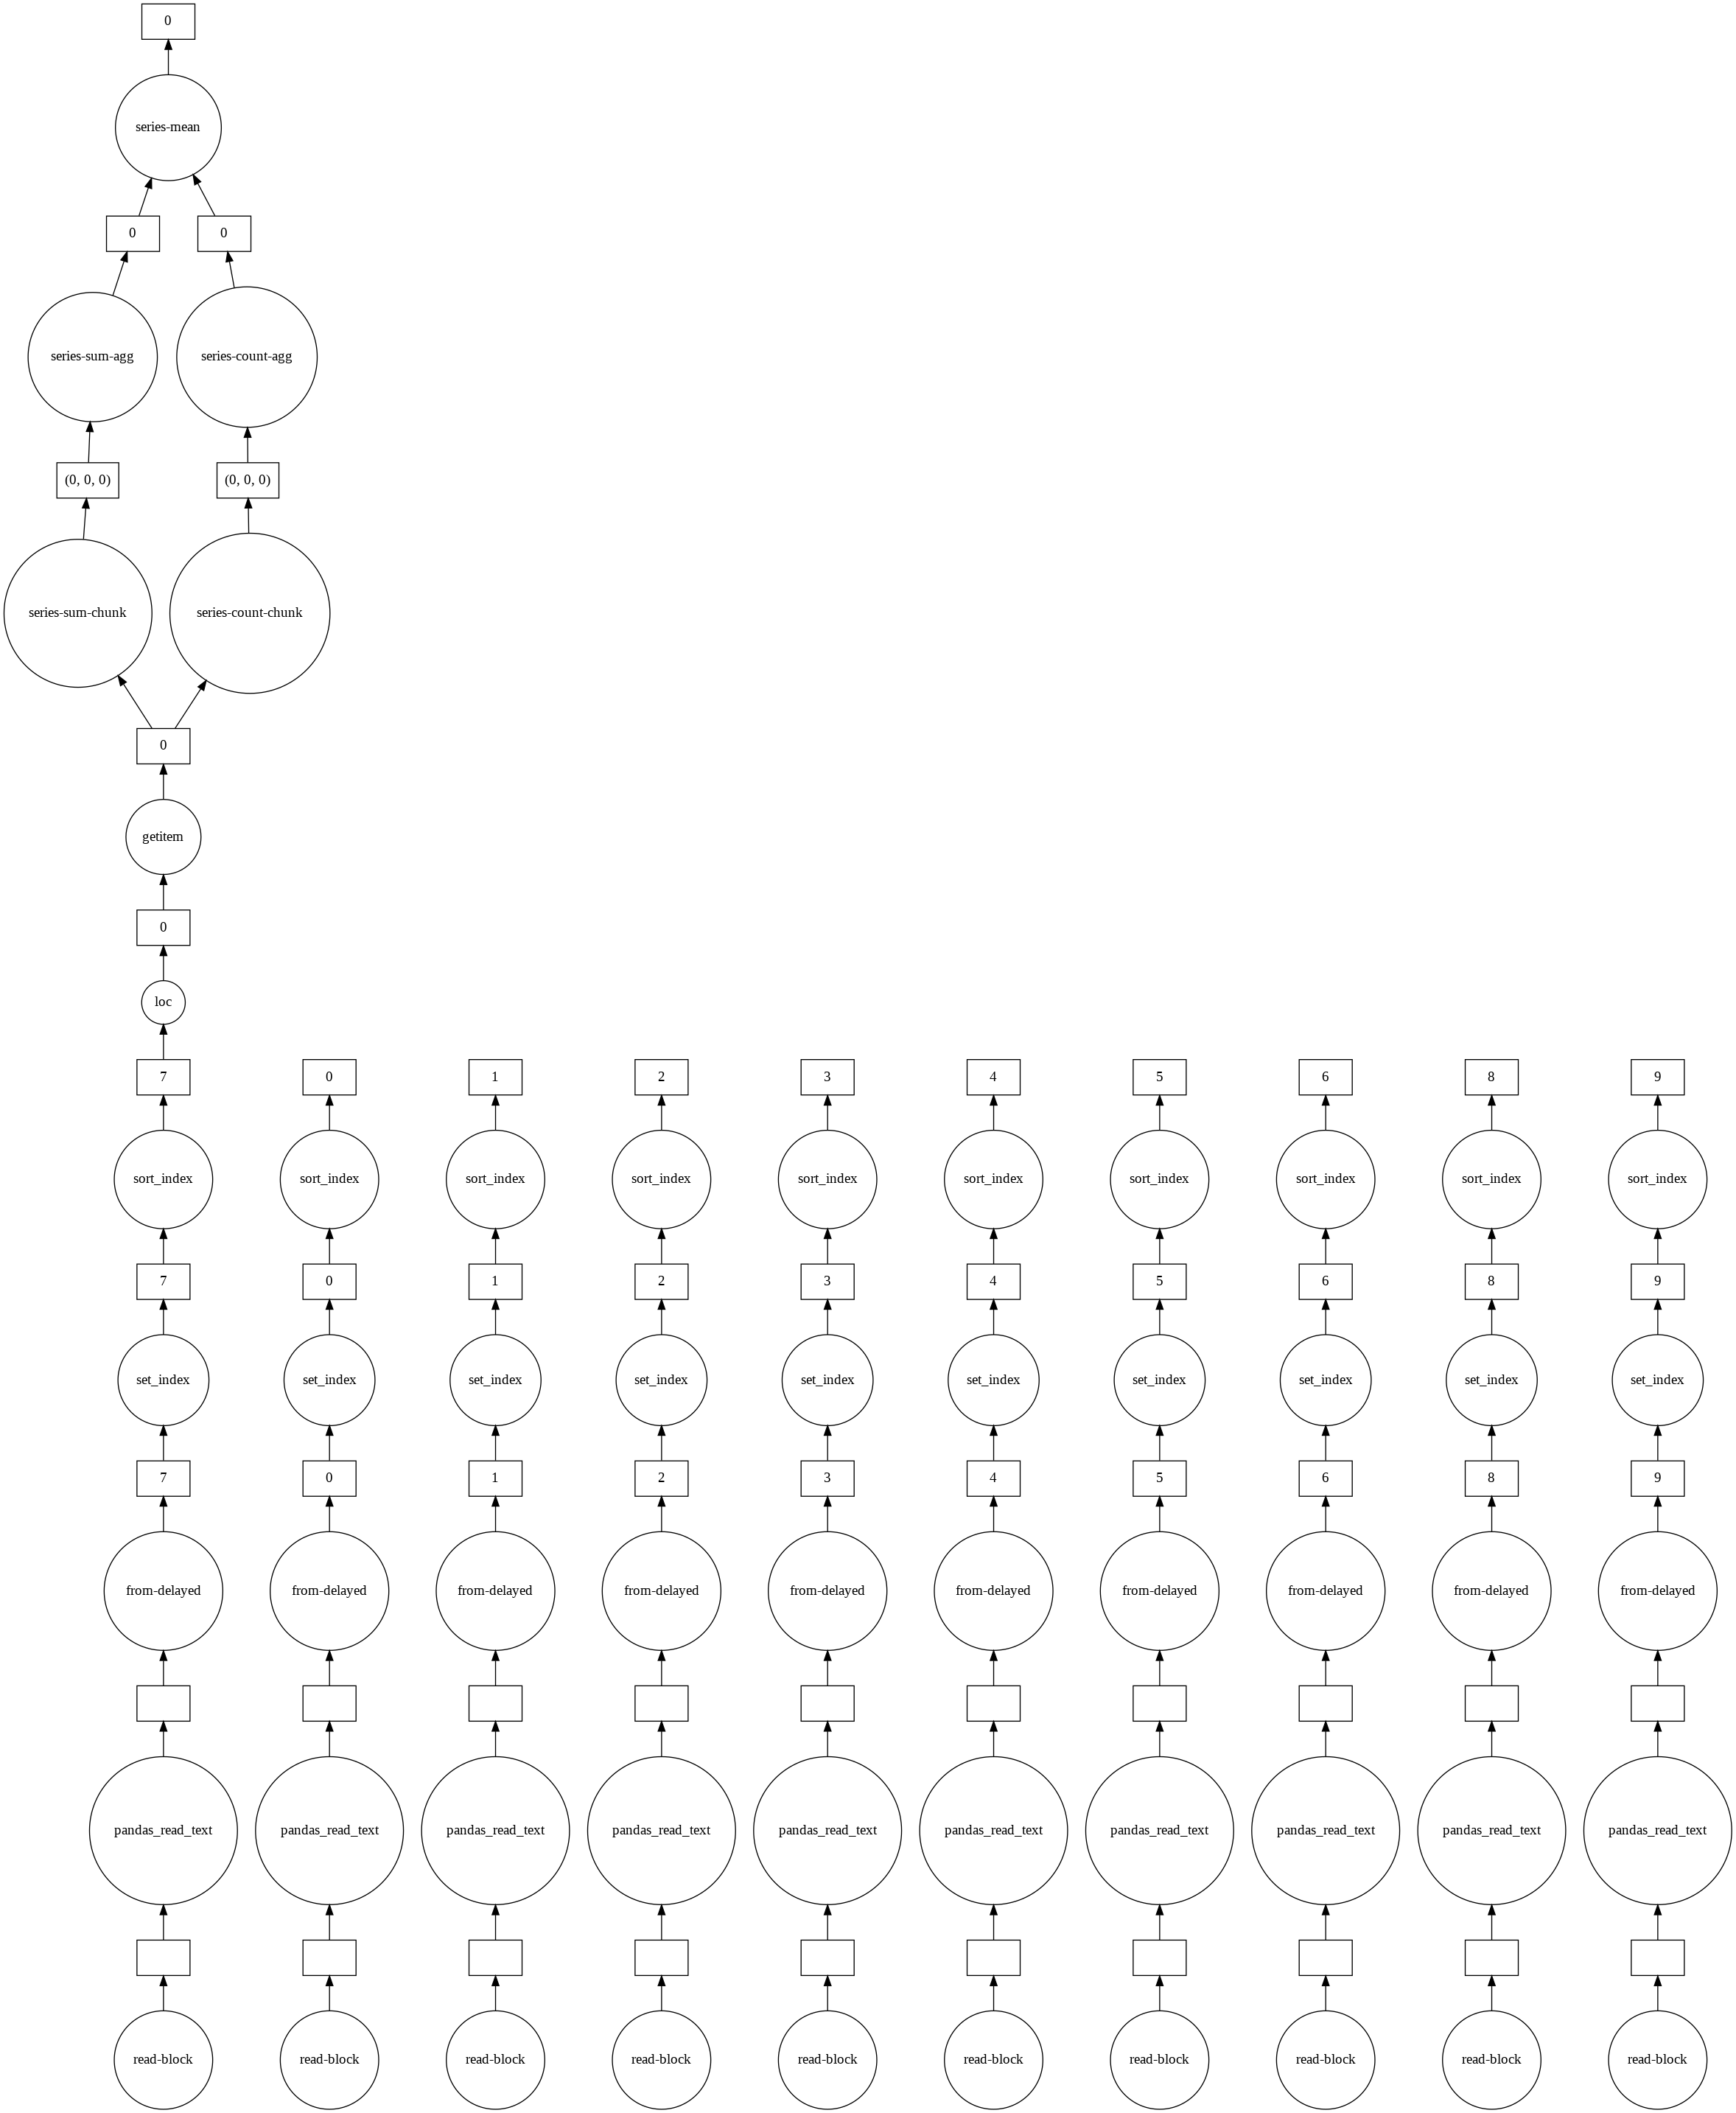

In [38]:
result.visualize()

Однако, если мы установим индекс для какого-либо нового столбца, тогда dask разделит наши данные примерно равномерно по этому столбцу и создаст для нас новые подразделения. Предупреждение, `set_index` запускает немедленные вычисления.

In [33]:
df2 = df.set_index('Year')
df2.divisions

(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 1999)

In [35]:
df2.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Year,,,,,,,,,,,,,,,,,,,,,
1990,1,1,1,1621.0,1540,1747.0,1701,US,33,NaN,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,2,2,1547.0,1540,1700.0,1701,US,33,NaN,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,3,3,1546.0,1540,1710.0,1701,US,33,NaN,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,4,4,1542.0,1540,1710.0,1701,US,33,NaN,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,5,5,1549.0,1540,1706.0,1701,US,33,NaN,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


Мы видим здесь минимальные и максимальные значения (1990 и 1999 гг.), а также промежуточные значения, которые хорошо разделяют наши данные. Этот набор данных состоит из десяти разделов, поскольку предполагается, что конечное значение является инклюзивной правой стороной для последнего бина.

In [39]:
df2.npartitions

10

In [40]:
df2.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Year,,,,,,,,,,,,,,,,,,,,,
1990,1,1,1,1621.0,1540,1747.0,1701,US,33,NaN,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,2,2,1547.0,1540,1700.0,1701,US,33,NaN,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,3,3,1546.0,1540,1710.0,1701,US,33,NaN,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,4,4,1542.0,1540,1710.0,1701,US,33,NaN,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,5,5,1549.0,1540,1706.0,1701,US,33,NaN,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


Одним из преимуществ этого является то, что такие операции, как `loc`, должны загружать только соответствующие разделы.

In [41]:
df2.loc[1991]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,
1991,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
1991,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
df2.loc[1991].compute()

## Делимся промежуточными результатами

При вычислении всего вышеперечисленного мы иногда проделывали одну и ту же операцию более одного раза. Для большинства операций dask.dataframe хеширует аргументы, позволяя совместно использовать повторяющиеся вычисления и вычислять их только один раз.

Например, давайте вычислим среднее значение и стандартное отклонение для задержки вылета всех неотмененных рейсов:

In [42]:
non_cancelled = df[~df.Cancelled]
mean_delay = non_cancelled.DepDelay.mean()
std_delay = non_cancelled.DepDelay.std()

#### 2 вызова `.compute`:

In [43]:
%%time
mean_delay_res = mean_delay.compute()
std_delay_res = std_delay.compute()
mean_delay_res, std_delay_res

CPU times: user 22.5 s, sys: 1.23 s, total: 23.8 s
Wall time: 15.1 s


(9.206602541321965, 28.974539774551456)

#### 1 вызов `dask.compute`:

In [44]:
%%time
mean_delay_res, std_delay_res = dask.compute(mean_delay, std_delay)
mean_delay_res, std_delay_res

CPU times: user 10.4 s, sys: 334 ms, total: 10.7 s
Wall time: 6.11 s


(9.206602541321965, 28.974539774551456)

Использование dask.compute занимает примерно половину времени. Это связано с тем, что графы задач для обоих результатов объединяются при вызове dask.compute, что позволяет выполнять общие операции только один раз, а не дважды. В частности, использование `dask.compute` делает следующее только один раз:

- вызовы `read_csv`
- фильтр (`df[~df.Cancelled]`)
- некоторые необходимые сокращения (`sum`, `count`)

Чтобы увидеть, как выглядят объединенные графики задач между несколькими результатами (и что является общим), вы можете использовать функцию `dask.visualize` (мы могли бы использовать `filename='graph.pdf'`, чтобы лучше увеличить график ):

In [ ]:
dask.visualize(mean_delay, std_delay)